In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [4]:
life_expectancy_path = "life_expectancy.csv"

life_expectancy_data = pd.read_csv(life_expectancy_path)

life_expectancy_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
life_exp_df = life_expectancy_data.copy()

type(life_exp_df)

pandas.core.frame.DataFrame

In [6]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:

reduced_df = life_exp_df[['Country', 'Year', 'Status', 'Life expectancy ',
       'Alcohol', ' BMI ', 'Total expenditure','GDP', 'Population',
       'Income composition of resources', 'Schooling']]

reduced_df.columns = [col.strip() for col in reduced_df.columns]

reduced_df

,Country,Year,Status,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,4.36,27.1,7.13,454.366654,12777511.0,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,4.06,26.7,6.52,453.351155,12633897.0,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,4.43,26.3,6.53,57.348340,125525.0,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,1.72,25.9,6.16,548.587312,12366165.0,0.427,9.8


In [8]:
# pd.set_option('display.max_rows', None)
reduced_df['Country'].value_counts()

Somalia         16
Malawi          16
Germany         16
El Salvador     16
Angola          16
                ..
Tuvalu           1
Monaco           1
Palau            1
Niue             1
Cook Islands     1
Name: Country, Length: 193, dtype: int64

In [9]:
drop_countries = ['San Marino', 'Marshall Islands', 'Cook Islands', 'Saint Kitts and Nevis', 'Niue', 'Palau', 'Dominica', 'Monaco', 'Nauru',
                  'Tuvalu']

for country in drop_countries:
    reduced_df.drop(reduced_df[reduced_df['Country'] == country].index, inplace=True)
    
reduced_df['Country'].value_counts()  

C:\Users\John Khazzaka\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Somalia     16
Angola      16
Chile       16
Rwanda      16
Congo       16
            ..
Nepal       16
Cameroon    16
Gambia      16
Grenada     16
Mongolia    16
Name: Country, Length: 183, dtype: int64

# -------------------------------------------------------------------------------------------------------------------

# BMI Hypothesis Data Cleaning/Organizing

In [20]:
#BMItoLife

# bmi_clean_df = reduced_df
bmi_drop_values = ['Sudan', 'South Sudan']

bmi_clean_dfx = reduced_df[reduced_df.Country.isin(bmi_drop_values) == False]

# for country in BMI_drop:
#     bmi_clean_dfx.drop(bmi_clean_dfx[bmi_clean_dfx['Country'] == country].index, inplace=True)

unique_df = bmi_clean_dfx.drop_duplicates("Country")

developed_df = bmi_clean_dfx[bmi_clean_dfx.Status != "Developing"]
developing_df = bmi_clean_dfx[bmi_clean_dfx.Status != "Developed"]

developed = len(unique_df.loc[unique_df["Status"] == "Developed"])
developing = len(unique_df.loc[unique_df["Status"] == "Developing"])

bmi_df = bmi_clean_dfx.groupby("Country").mean()
bmi_dfx = bmi_clean_dfx.groupby("Status").mean()
developed_data = developed_df.groupby("Country").mean()
developing_data = developing_df.groupby("Country").mean()

# PieChart for Country Status

Text(0.5, 1.0, 'Country Status')

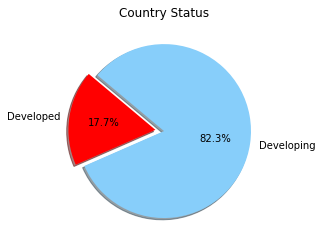

In [21]:
labels = ["Developed", "Developing"]
sizes = [developed, developing]
colors = ["red", "lightskyblue"]
explode = (0.1, 0)

py_pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title ("Country Status")

# Bar Chart for Average BMI by Country Status

Text(0, 0.5, 'Average BMI')

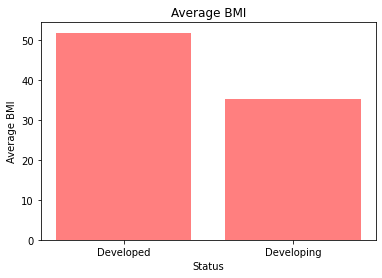

In [22]:
x_axis = ["Developed", "Developing"]
count = bmi_dfx["BMI"]

plt.bar(x_axis, count, color='r', alpha=0.50, align="center")
# plt.xticks(rotation=90)
plt.title("Average BMI")
plt.xlabel("Status")
plt.ylabel("Average BMI")

# Scatter Plot for BMI and Life Expectancy for Developed Countries

Text(0.5, 1.0, 'BMI Impact on Life Expectancy (Developed Nations)')

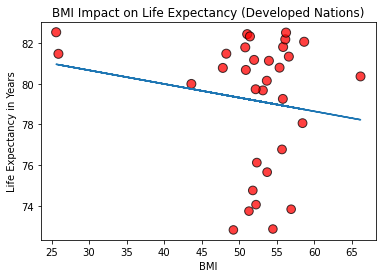

In [14]:
bmi = developed_data["BMI"]
life = developed_data["Life expectancy"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(bmi, life)
py_fit = py_slope * bmi + py_int
plt.plot(bmi,py_fit,"-")

plt.scatter(bmi, life, marker="o", facecolors="red", edgecolors="black",
               s=life, alpha=0.75)
plt.xlabel("BMI")
plt.ylabel("Life Expectancy in Years")
plt.title("BMI Impact on Life Expectancy (Developed Nations)")

# Scatter Plot for BMI and Life Expectancy for Developing Countries

Text(0.5, 1.0, 'BMI Impact on Life Expectancy (Developing Nations)')

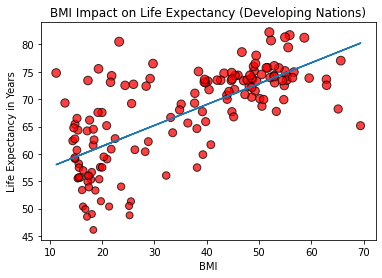

In [15]:
bmix = developing_data["BMI"]
lifex = developing_data["Life expectancy"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(bmix, lifex)
py_fit = py_slope * bmix + py_int
plt.plot(bmix,py_fit,"-")

plt.scatter(bmix, lifex, marker="o", facecolors="red", edgecolors="black",
               s=lifex, alpha=0.75)
plt.xlabel("BMI")
plt.ylabel("Life Expectancy in Years")
plt.title("BMI Impact on Life Expectancy (Developing Nations)")

# Summary Statistics for BMI

In [18]:
cor = round(st.pearsonr(life, bmi)[0],2)
corx = round(st.pearsonr(lifex, bmix)[0],2)

In [19]:
developed_df.describe()

,Year,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
count,512.000000,512.000000,484.000000,512.000000,480.000000,448.000000,4.160000e+02,464.000000,464.000000
mean,2007.500000,79.197852,9.826736,51.803906,7.554042,22053.386446,6.830053e+06,0.852489,15.845474
std,4.614281,3.930942,2.765858,17.196829,2.984389,22870.827763,1.479524e+07,0.052843,1.766799
min,2000.000000,69.900000,0.010000,3.200000,1.100000,12.277330,1.230000e+02,0.703000,11.500000
25%,2003.750000,76.800000,8.617500,53.775000,6.407500,3875.740910,1.993282e+05,0.815000,14.700000
50%,2007.500000,79.250000,10.320000,57.450000,7.895000,13560.723860,1.167660e+06,0.862000,15.800000
75%,2011.250000,81.700000,11.697500,61.300000,9.212500,36760.425993,5.759450e+06,0.894000,16.800000
max,2015.000000,89.000000,15.190000,69.600000,17.600000,119172.741800,8.253418e+07,0.948000,20.700000


# Extra BMI Code

In [ ]:
# bmi = bmi_df["BMI"]
# life = bmi_df["Life expectancy"]

# py_slope, py_int, py_r, py_p, py_std_err = st.linregress(bmi, life)
# py_fit = py_slope * bmi + py_int
# plt.plot(bmi,py_fit,"-")

# plt.scatter(bmi, life, marker="o", facecolors="red", edgecolors="black",
#               s=life, alpha=0.75)
# plt.xlabel("BMI")
# plt.ylabel("Life Expectancy in Years")
# plt.title("BMI Impact on Life Expectancy")

In [ ]:
# # # bmi = bmi_df["BMI"]
# # # life = bmi_df["Life expectancy"]

# py_slope, py_int, py_r, py_p, py_std_err = st.linregress(life, bmi)
# py_fit = py_slope * life + py_int
# plt.plot(life,py_fit,"-")

# plt.scatter(life, bmi, marker="o", facecolors="red", edgecolors="black",
#               s=bmi, alpha=0.75)
# plt.xlabel("Life Expectancy in Years")
# plt.ylabel("BMI")
# plt.title("BMI Impact on Life Expectancy")